In [69]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [70]:
df = pd.read_csv('train.csv')

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [74]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [75]:
df1 = df.drop('Cabin',axis =1)

In [76]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [77]:
df2 = df['Name']

In [78]:
df2

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [79]:
df4 = df1.drop('Name', axis=1)

In [80]:
df4 = df4.drop('Ticket',axis=1)


In [81]:
df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [82]:
df4.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [83]:
df5 =df4.drop('Embarked', axis=1)

In [84]:
df5.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [85]:
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [86]:
df5 = df5.drop('PassengerId',axis=1)

In [87]:
df5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [88]:
dummies = pd.get_dummies(df['Sex'])

In [89]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [90]:
df6 = pd.concat([df5,dummies],axis=1)

In [91]:
df7 =df6.drop('Sex',axis=1)

In [92]:
mean_age = df7['Age'].mean()
mean_age

29.69911764705882

In [93]:
df7['Age'].fillna(mean_age,inplace= True)

In [94]:
df7.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
dtype: int64

In [95]:
df7

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,1,0
2,1,3,26.000000,0,0,7.9250,1,0
3,1,1,35.000000,1,0,53.1000,1,0
4,0,3,35.000000,0,0,8.0500,0,1
5,0,3,29.699118,0,0,8.4583,0,1
6,0,1,54.000000,0,0,51.8625,0,1
7,0,3,2.000000,3,1,21.0750,0,1
8,1,3,27.000000,0,2,11.1333,1,0
9,1,2,14.000000,1,0,30.0708,1,0


In [96]:
df7['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

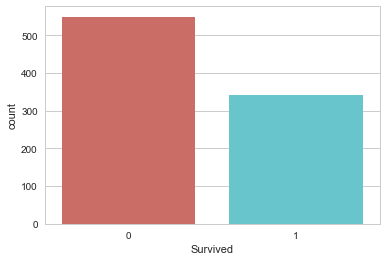

In [97]:
sns.countplot(x='Survived',data=df7,palette='hls')

In [98]:
df7.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,female,male
Survived,,,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887,0.147541,0.852459
1,1.950292,28.549778,0.473684,0.464912,48.395408,0.681287,0.318713


In [99]:
df7['Age'].unique()

array([ 22.        ,  38.        ,  26.        ,  35.        ,
        29.69911765,  54.        ,   2.        ,  27.        ,
        14.        ,   4.        ,  58.        ,  20.        ,
        39.        ,  55.        ,  31.        ,  34.        ,
        15.        ,  28.        ,   8.        ,  19.        ,
        40.        ,  66.        ,  42.        ,  21.        ,
        18.        ,   3.        ,   7.        ,  49.        ,
        29.        ,  65.        ,  28.5       ,   5.        ,
        11.        ,  45.        ,  17.        ,  32.        ,
        16.        ,  25.        ,   0.83      ,  30.        ,
        33.        ,  23.        ,  24.        ,  46.        ,
        59.        ,  71.        ,  37.        ,  47.        ,
        14.5       ,  70.5       ,  32.5       ,  12.        ,
         9.        ,  36.5       ,  51.        ,  55.5       ,
        40.5       ,  44.        ,   1.        ,  61.        ,
        56.        ,  50.        ,  36.        ,  45.5 

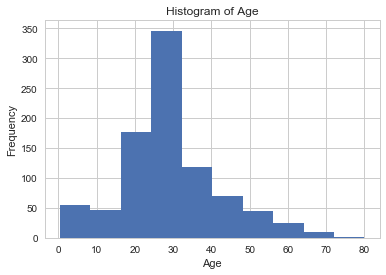

In [100]:
df7.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [101]:
df_vars=df7.columns.values.tolist()
y=['Survived']
X=[i for i in df_vars if i not in y]

In [102]:
#FeatureSelection
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(df7[X], df7[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
df7.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female',
       'male'],
      dtype='object')

In [104]:
x = df7[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female',
       'male']]
y =df7['Survived']

In [105]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442607
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sat, 12 May 2018   Pseudo R-squ.:                  0.3353
Time:                        15:50:01   Log-Likelihood:                -394.36
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 7.794e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.0843      0.139     -7.794      0.000      -1.357      -0.812
Age           -0.0397      0.

In [106]:
#Look at p valeus and it says that Variables Parch and Fare anr insignificant.
x = df7[['Pclass', 'Age', 'SibSp', 'female',
       'male']]
y =df7['Survived']

In [107]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.443796
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sat, 12 May 2018   Pseudo R-squ.:                  0.3336
Time:                        15:50:01   Log-Likelihood:                -395.42
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.236e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1724      0.120     -9.792      0.000      -1.407      -0.938
Age           -0.0398      0.

In [108]:
#Using Logistics Regression Model
df8 = pd.read_csv('test.csv')

In [109]:
df8.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [110]:
df8.drop(['PassengerId','Parch','Ticket','Cabin'], axis= 1, inplace=True)

In [111]:
df8.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Fare         1
Embarked     0
dtype: int64

In [112]:
mean_age = df8['Age'].mean()
mean_age

30.272590361445783

In [113]:
df8['Age'].fillna(mean_age,inplace=True)

In [114]:
df8.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Fare        1
Embarked    0
dtype: int64

In [115]:
df8.dropna(inplace=True)

In [116]:
df8.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [119]:
dummies1 = pd.get_dummies(df8['Sex'])

In [120]:
dummies1

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [121]:
df9 = pd.concat([df8,dummies1],axis=1)

In [122]:
df9.drop('Sex',axis=1,inplace=True)

In [123]:
df9.columns

Index(['Pclass', 'Name', 'Age', 'SibSp', 'Fare', 'Embarked', 'female', 'male'], dtype='object')

In [124]:
x_test = df9[['Pclass', 'Age', 'SibSp', 'female',
       'male']]
y_pred1 = logreg.predict(x_test)

In [125]:
df9.columns

Index(['Pclass', 'Name', 'Age', 'SibSp', 'Fare', 'Embarked', 'female', 'male'], dtype='object')

In [126]:
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0,

In [127]:
y_pred2= pd.DataFrame(y_pred1)

In [128]:

y_pred2

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [129]:
df10 = pd.concat([df9,y_pred2],axis=1)

In [130]:
df10.columns

Index(['Pclass', 'Name', 'Age', 'SibSp', 'Fare', 'Embarked', 'female', 'male',
       0],
      dtype='object')

In [131]:
df10.rename(columns={0:'Survived'},inplace=True)

In [132]:
df10

,Pclass,Name,Age,SibSp,Fare,Embarked,female,male,Survived
0,3.0,"Kelly, Mr. James",34.50000,0.0,7.8292,Q,0.0,1.0,0.0
1,3.0,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1.0,7.0000,S,1.0,0.0,0.0
2,2.0,"Myles, Mr. Thomas Francis",62.00000,0.0,9.6875,Q,0.0,1.0,0.0
3,3.0,"Wirz, Mr. Albert",27.00000,0.0,8.6625,S,0.0,1.0,0.0
4,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1.0,12.2875,S,1.0,0.0,1.0
5,3.0,"Svensson, Mr. Johan Cervin",14.00000,0.0,9.2250,S,0.0,1.0,0.0
6,3.0,"Connolly, Miss. Kate",30.00000,0.0,7.6292,Q,1.0,0.0,1.0
7,2.0,"Caldwell, Mr. Albert Francis",26.00000,1.0,29.0000,S,0.0,1.0,0.0
8,3.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.00000,0.0,7.2292,C,1.0,0.0,1.0
9,3.0,"Davies, Mr. John Samuel",21.00000,2.0,24.1500,S,0.0,1.0,0.0


In [133]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.788


In [134]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[144  24]
 [ 30  70]]


In [135]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.83      0.86      0.84       168
          1       0.74      0.70      0.72       100

avg / total       0.80      0.80      0.80       268



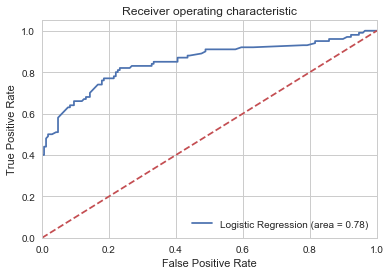

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [137]:
df10

,Pclass,Name,Age,SibSp,Fare,Embarked,female,male,Survived
0,3.0,"Kelly, Mr. James",34.50000,0.0,7.8292,Q,0.0,1.0,0.0
1,3.0,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1.0,7.0000,S,1.0,0.0,0.0
2,2.0,"Myles, Mr. Thomas Francis",62.00000,0.0,9.6875,Q,0.0,1.0,0.0
3,3.0,"Wirz, Mr. Albert",27.00000,0.0,8.6625,S,0.0,1.0,0.0
4,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1.0,12.2875,S,1.0,0.0,1.0
5,3.0,"Svensson, Mr. Johan Cervin",14.00000,0.0,9.2250,S,0.0,1.0,0.0
6,3.0,"Connolly, Miss. Kate",30.00000,0.0,7.6292,Q,1.0,0.0,1.0
7,2.0,"Caldwell, Mr. Albert Francis",26.00000,1.0,29.0000,S,0.0,1.0,0.0
8,3.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.00000,0.0,7.2292,C,1.0,0.0,1.0
9,3.0,"Davies, Mr. John Samuel",21.00000,2.0,24.1500,S,0.0,1.0,0.0


In [139]:
df10.dropna(inplace=True)


In [140]:
df10

,Pclass,Name,Age,SibSp,Fare,Embarked,female,male,Survived
0,3.0,"Kelly, Mr. James",34.50000,0.0,7.8292,Q,0.0,1.0,0.0
1,3.0,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1.0,7.0000,S,1.0,0.0,0.0
2,2.0,"Myles, Mr. Thomas Francis",62.00000,0.0,9.6875,Q,0.0,1.0,0.0
3,3.0,"Wirz, Mr. Albert",27.00000,0.0,8.6625,S,0.0,1.0,0.0
4,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1.0,12.2875,S,1.0,0.0,1.0
5,3.0,"Svensson, Mr. Johan Cervin",14.00000,0.0,9.2250,S,0.0,1.0,0.0
6,3.0,"Connolly, Miss. Kate",30.00000,0.0,7.6292,Q,1.0,0.0,1.0
7,2.0,"Caldwell, Mr. Albert Francis",26.00000,1.0,29.0000,S,0.0,1.0,0.0
8,3.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.00000,0.0,7.2292,C,1.0,0.0,1.0
9,3.0,"Davies, Mr. John Samuel",21.00000,2.0,24.1500,S,0.0,1.0,0.0


In [141]:
df10.to_csv('submission.csv')